# [Topic Modeling](https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24)

In [10]:

from pprint import pprint
import numpy as np
np.random.seed(2018)
import nltk

# reload only imported modules before run
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

'''
pantree bank tags: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
standford source: https://nlp.stanford.edu/software/CRF-NER.shtml
standford online text tree generater: http://nlp.stanford.edu:8080/parser/index.jsp
'''

'\npantree bank tags: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html\nstandford source: https://nlp.stanford.edu/software/CRF-NER.shtml\nstandford online text tree generater: http://nlp.stanford.edu:8080/parser/index.jsp\n'

### constants

In [11]:
start_date = '01-11-2018' #  09-Sep-2018 
end_date = '30-12-2018' # 01-Oct-2018

### We will perform the following steps:

#### 1. Tokenization: 
Split the text into sentences and the sentences into words. Lowercase the words and remove punctuation.

In [12]:
# def tokenize(text):
#     return gensim.utils.simple_preprocess(text)

#### 2. Remove small words:
Words that have fewer than 3 characters are removed.

In [13]:
# def isShortWord(token):
#     return len(token) < 3

#### 3. Remove stopwords:
All stopwords are removed.

In [14]:
# def isStopWord(token):
#     return token in gensim.parsing.preprocessing.STOPWORDS

#### 4. lemmatized +  Stemming:
Words are lemmatized — words in third person are changed to first person and verbs in past and future tenses are changed into present.

Words are stemmed — words are reduced to their root form.

In [15]:
# from nltk.corpus import wordnet as wn
# from nltk import pos_tag, word_tokenize
# from nltk.stem.porter import *
# from textblob import TextBlob


# def lemmatize_stemming(token):
#     stemmer = PorterStemmer() #gensim.parsing.stem_text(tokenize) #
#     for word, tag in pos_tag(word_tokenize(token)):
#         wntag = tag[0].lower()
#         wntag = wntag if wntag in ['a', 'r', 'n', 'v'] else None
#         lemma = WordNetLemmatizer().lemmatize(word, wntag) if wntag else word
#         return TextBlob(lemma).words[0].singularize()
#     return ''

#### 5. Replace Emojis:

In [16]:
# ## get emoji characters file path
# def getEmojis():
#     from dataSource import getEmojis
#     comments_file_path = getDataSourcePathFor(emoji_path)
#     return getEmojis(comments_file_path)#.head()

In [17]:
# def hasEmojicon(token):
    
# def replaceEmojicons(token, emojies):
#     pass
    

## Data Source

In [18]:
# def getNounList(sentence='', tokens = []):
#     from nltk import word_tokenize, pos_tag
#     if len(tokens) > 0:    
#         nouns = [token for token, pos in pos_tag(tokens) if pos.startswith('NN')]
#         return nouns
#     else:
#         nouns = [token for token, pos in pos_tag(word_tokenize(sentence)) if pos.startswith('NN')]
#         return nouns

In [19]:
# text = 'I Have done reviewing, Will be seeing by them'
# print(preprocess(text))

In [20]:
# key is file storage path
# def getDataSourcePathFor(keyForFilePath):
#     import json
#     import os
    
#     config_file_path = os.environ[virtual_env] + '/config.json'

#     with open(config_file_path) as f:
#         config = json.load(f)
#         if keyForFilePath in config:# ['comments_path', 'output_path']
#             return config[keyForFilePath] 
#     return None

In [21]:
# ## get list of comments from stored input csv file
# import dataSource 

# def getListOfComments():
#     ### This is to get csv rows between given dates
#     comments_file_path = getDataSourcePathFor(comments_path)
#     commentsList = getComments(comments_file_path, start_date, end_date) #['comments'] 
#     commentsList = commentsList.sort_values(by='ratings', ascending=True)['comments'] 
#     print('Total number of comments: %s between %s and %s' % (len(commentsList), start_date, end_date))
#     return commentsList

### Text processing

In [22]:
# import re

# def filterWord(token):
#     if not (isStopWord(token) or isShortWord(token)):
#         lemmaWord = lemmatize_stemming(token)
#         if not isShortWord(lemmaWord):
#             return ("".join(re.findall("[a-zA-Z]+", lemmaWord)).lower())
#     return None 
    
# def filters(sentence):
# #     print('..given comments:', sentence)
#     result = []
#     #nouns = getNounList(sentence) # fetch only Nouns
#     for token in tokenize(sentence):#nouns: ###tokenize(text):
#         result.append(filterWord(token))
#     return result

# def filterWords(tokens):
#     return list(filter(lambda token: filterWord(token), tokens))

In [23]:
# def preprocessCommentDocument(document):
#     return list(map(lambda sentence: filters(sentence), document))

### Word Cloud

In [24]:
from wordCloud import showWordCloud
def showCloud(topicCollection):
    showWordCloud(topicCollection) 

### Bag of Words on the Data set

In [25]:
def bow(processed_docs):
    dictionary = gensim.corpora.Dictionary(processed_docs)
    bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
    return bow_corpus

### Sentiment

In [26]:
from getSentiment import getSentiment

def getSentFromCommentList(commentList):
    sentimentList = []
    for sentence in commentList:
        sentiment = getSentiment(sentence)
        sentimentList.append(sentiment)
    return sentimentList


def isNegative(sentiment):
    return sentiment > 0.5


def tokenDictWithPosNegSentiment(sentimentList, document):
    sentDict = {}
    size = range(len(document))
    
    for i in size:
        for token in document[i]:
            v = (0, 0, 0) # (neg, pos, freq)
            if token in sentDict:
                v = sentDict[token]
                
            if isNegative(sentimentList[i]):
                v = (v[0]+1, v[1], v[2]+1)
            else:
                v = (v[0], v[1]+1, v[2]+1)
            sentDict[token] = v
    sentDict.pop('', None)
    return sentDict 

### Main()

In [27]:
import SDataSource
import SConstants
from SWordList import SWordList
from sUtility import SUtility
from sPreprocessor import SPreprocessor


In [28]:
sutility = SUtility()
spreprocessor = SPreprocessor()

# SPreprocessor.resolveDependancy(trieCommon)
dateBetween = [start_date, end_date]
commentsDocument = SDataSource.getListOfComments(dateBetween)#.head(1000)
print('filtered comments: ', len(commentsDocument))
# document preprocessing, cleaning, filtering, replacement, spliting into multiple senetnces from one
processed_doc = []
for sentence in commentsDocument:
    for each in spreprocessor.docCleaning(sentence, False): #should split by ','
        processed_doc.append(each)


Total number of comments: 972 between 01-11-2018 and 30-12-2018
filtered comments:  557


In [29]:
def makeDict(sentence):
    t = spreprocessor.parseToTokens(trieTopic, sentence)
    r = spreprocessor.parseToTokens(trieNReason, sentence)
    print(sentence)
    print('topic is:', t)
    print('reasons are:', r)
    print()
    sutility.dump(t, r)

In [30]:
wordList_file = SDataSource.getDataSourcePathFor(SConstants.wordFile_path)
trieCommon = SWordList(wordList_file)

topic_file = SDataSource.getDataSourcePathFor(SConstants.topic_path)
trieTopic = SWordList(topic_file)

n_reason_file = SDataSource.getDataSourcePathFor(SConstants.n_reason_path)
trieNReason = SWordList(n_reason_file)

..SWordList constructor called 
..SWordList constructor called 
..SWordList constructor called 


In [31]:
l = ['crashing', 'changes', 'upi', 'biometric']
print(spreprocessor.filterWords(l))
    

['crash', 'chang', 'upi', 'biometr']


In [32]:
for each in processed_doc:
    makeDict(each)

authenticate me for contacting live agent is not working nonoptimized laggy app wont get cashbacks until you contact  times but still its a good app the online banking website on other hand is very good
topic is: ['app']
reasons are: ['not working']

awesome bank service and userfriendly bank app
topic is: ['app']
reasons are: ['servic']

this is very good bank and bank transfer limit is very high
topic is: []
reasons are: ['transfer']

superb job  the quickest
topic is: []
reasons are: []

nice but cant understand the difference between zero and o in this app for acc no and ifsc code
topic is: ['app', 'ifsc']
reasons are: []

supar
topic is: []
reasons are: []

hasslefree banking system
topic is: []
reasons are: []

useful and easy
topic is: []
reasons are: []

good
topic is: []
reasons are: []

i liked but to activate debit card it is taking long time
topic is: ['debit card']
reasons are: ['card']

banking made damn easy love you dbs keep rocking 
topic is: []
reasons are: []

please

reasons are: []

very eyes banking
topic is: []
reasons are: []

amazing bank with amazing app
topic is: ['app']
reasons are: []

very very nice app good
topic is: ['app']
reasons are: []

super
topic is: []
reasons are: []

nice bank
topic is: []
reasons are: []

nice
topic is: []
reasons are: []

good bank i got a personal loan with  roi i not given any one document this interest compare with other banks its low
topic is: [None]
reasons are: []

super
topic is: []
reasons are: []

very nyc all
topic is: []
reasons are: []

its really beautiful bank
topic is: []
reasons are: []

awesome
topic is: []
reasons are: []

good
topic is: []
reasons are: []

good app and best service
topic is: ['app']
reasons are: ['servic']

good
topic is: []
reasons are: []

good
topic is: []
reasons are: []

love this app as it eases my banking keep up the good work
topic is: ['app']
reasons are: []

very hassle free banking love digibank
topic is: []
reasons are: []

nice paper less digital banking with a

topic is: []
reasons are: []

good i like this netbanking
topic is: ['netbank']
reasons are: []

good
topic is: []
reasons are: []

this app helped me many time
topic is: ['app']
reasons are: []

exellent
topic is: []
reasons are: []

great app
topic is: ['app']
reasons are: []

excellent app
topic is: ['app']
reasons are: []

good
topic is: []
reasons are: []

good
topic is: []
reasons are: []

its great
topic is: []
reasons are: []

nice ways for saving everyonenice to use
topic is: []
reasons are: []

nice and useful app so i recommend
topic is: ['app']
reasons are: []

really good nd great
topic is: []
reasons are: []

very awesome app but a little problem is that it works slowly
topic is: ['app']
reasons are: ['problem']

till now everthing is ok
topic is: []
reasons are: []

excellent app
topic is: ['app']
reasons are: []

good
topic is: []
reasons are: []

nice
topic is: []
reasons are: []

best ever made for indian its very useful  helpful
topic is: []
reasons are: []

fabuluou

good
topic is: []
reasons are: []

good
topic is: []
reasons are: []

good
topic is: []
reasons are: []

it take lot of time to open the aap
topic is: []
reasons are: ['open']

lovely
topic is: []
reasons are: []

great
topic is: []
reasons are: []

its very useful to me 
topic is: []
reasons are: []

thanks
topic is: []
reasons are: []

very nice app useful
topic is: ['app']
reasons are: []

loving it
topic is: []
reasons are: []

good
topic is: []
reasons are: []

nice
topic is: []
reasons are: []

thanks
topic is: []
reasons are: []

very nice app
topic is: ['app']
reasons are: []

superrr cool
topic is: []
reasons are: []

osm
topic is: []
reasons are: []

app not getting installed
topic is: ['app']
reasons are: []

good
topic is: []
reasons are: []

usefulness application
topic is: []
reasons are: []

very good serviced
topic is: []
reasons are: []

it is giving me libraries tempering error even when i dont have rooted device
topic is: []
reasons are: ['error']

wonderful bank app

topic: ('app', 148)
reasons [('servic', 13), ('open', 7), ('slow', 6), ('card', 5), ('not working', 5), ('problem', 5), ('transfer', 4), (None, 3), ('network', 3), ('smooth', 3), ('worst bank', 2), ('experi', 2), ('stop', 2), ('bad', 1), ('bug', 1), ('frustrat', 1), ('chang', 1), ('close', 1), ('secure network', 1), ('face', 1), ('something went wrong', 1), ('every time', 1)]


/home/nawaz/.virtualenvs/AWSComp/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


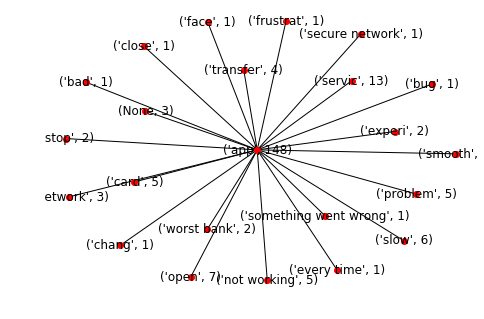

In [33]:
from sNetworkx import SNetworkx
snetworkx = SNetworkx()
t = sutility.getFamousTopics()[0]
r = sutility.getReasonDict()[0]
print('topic:', t)
print('reasons', r[1])
snetworkx.inputData(t, r[1])
snetworkx.show()

In [34]:
sutility.showTopicCounts()
print('---------------------------------')
sutility.showReasonDict()

[('app', 148), ('account', 26), ('debit card', 18), ('updat', 12), ('transact', 10), ('balanc', 9), ('login', 8), ('atm', 7), ('secur', 5), ('kyc', 5), (None, 4), ('customer service', 4), ('speed', 4), ('offer', 3), ('upi', 3), ('debit cards', 3), ('internet', 2), ('netbank', 2), ('version', 1), ('customer care', 1), ('permiss', 1), ('otp', 1), ('look', 1), ('ifsc', 1), ('charg', 1)]
---------------------------------
app
[('servic', 13), ('open', 7), ('slow', 6), ('card', 5), ('not working', 5), ('problem', 5), ('transfer', 4), (None, 3), ('network', 3), ('smooth', 3), ('worst bank', 2), ('experi', 2), ('stop', 2), ('bad', 1), ('bug', 1), ('frustrat', 1), ('chang', 1), ('close', 1), ('secure network', 1), ('face', 1), ('something went wrong', 1), ('every time', 1)]

account
[('open', 7), ('servic', 6), ('transfer', 5), ('card', 5), ('worst bank', 2), ('close', 1), ('stop', 1), ('slow', 1), ('reset', 1), ('bug', 1), ('frustrat', 1)]

debit card
[('card', 18), ('servic', 3), ('transfer',

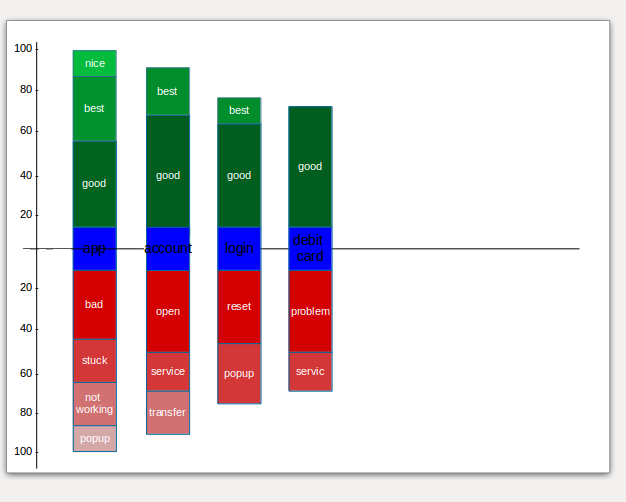

In [35]:
# from IPython.core.display import display, HTML
# # display(HTML('<h1>Hello, world!</h1>'))
# HTML(filename='g.html')
# from PIL import Image                                                                                
# img = Image.open('/home/nawaz/PycharmProjects/SentimentAnalysis/graphDemo.png')
# img.show() 

from IPython.display import Image

Image(filename = "/home/nawaz/PycharmProjects/SentimentAnalysis/graphDemo.png", width=500, height=500)

In [36]:
# sutility.showTopicCounts()
# sentList = commentsDocument.map()
# sentList = commentsDocument.map(getSentiment)

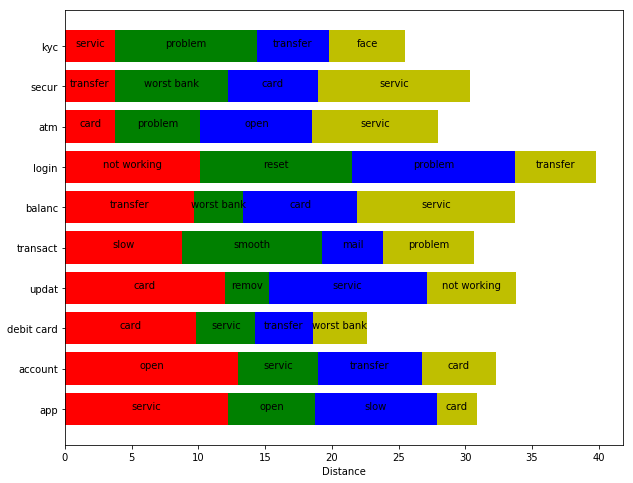

In [61]:
from sGraph import *
makeGraph(sutility.getReasonDict()) # topic + reason list

In [60]:
l = list(commentsDocument)
p = list(processed_doc)

length = len(l)

for i in range(length):
#     print(l[i])
    print(p[i])
    print()

authenticate me for contacting live agent is not working nonoptimized laggy app wont get cashbacks until you contact  times but still its a good app the online banking website on other hand is very good

awesome bank service and userfriendly bank app

this is very good bank and bank transfer limit is very high

superb job  the quickest

nice but cant understand the difference between zero and o in this app for acc no and ifsc code

supar

hasslefree banking system

useful and easy

good

i liked but to activate debit card it is taking long time

banking made damn easy love you dbs keep rocking 

please add option to see average monthlyquarterly balance

good

good bank

very good

nice services bt where to do fingerprint verification

very good app

good

good

very useful to transfer money to others within minuteand intrest level is good

i am new here and st time please consider user feedback very valuable please try to compare your ui with paytm bank ui you will going to find major 

In [29]:
# dump = list(zip(commentsDocument, processed_doc))
# length = len(dump)
# for i in range(length):
#     print(dump[i][0])
#     print(dump[i][1])
# #     print(sentList.iloc[i])
#     print()

In [62]:
import gensim
dictionary = gensim.corpora.Dictionary(processed_doc)
# dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=100000)
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_doc]

In [ ]:
from gensim import corpora, models
corpus_tfidf = models.TfidfModel(bow_corpus)[bow_corpus]

In [ ]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=5, id2word=dictionary, passes=2, workers=2)

In [ ]:
# indexFor = 5
# print('..COMMENT :', commentsDocument[indexFor])
# print('\n..CORPOS :', processed_doc[indexFor])
# # print('\n..BOW:', bow_corpus[indexFor])
# for index, score in sorted(lda_model_tfidf[bow_corpus[indexFor]], key=lambda tup: -1*tup[1]):
#     print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 5)))

In [ ]:
topics = lda_model_tfidf.print_topics(num_words=4)
for topic in topics:
    print(topic)

In [ ]:
# print(processed_doc.values)

In [ ]:
l = tokenDictWithPosNegSentiment(list(sentList), list(processed_doc))


In [ ]:
# print(sortedMostPos(l))

In [ ]:
from showBarGraph import *
# show positive bar graph
showBarCharForSentiment(sortedMostPos(l), pos=True)

In [ ]:
# print(sortedMostNeg(l))
# show positive bar graph
showBarCharForSentiment(sortedMostNeg(l), pos=False)

In [ ]:
showPiChart(sortedMostFreq(l))

In [ ]:
# showTempBarChart()